In [17]:
# 3 Sharpe Ratio for a portfolio
# Combining the risk and return. The greater the Sharpe Ratio, the more attractive the risk adjusted
# return.
# Zero risk is ofen likened to 10 yr treasury bonds:
# https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics?data=yield
# Standard Deviation will be used to statistically aproximate the risk of the portfolio.


import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yfin
yfin.pdr_override()

# To get around a breaking change in the yahoo finance API

tickers = ['NVDA', 'INTC', 'AMD', 'TSM']
start = dt.datetime(2019, 1, 1)
data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  4 of 4 completed


In [19]:
data.head()

Adj Close                                       Close             \
                  AMD       INTC       NVDA        TSM        AMD       INTC   
Date                                                                           
2019-01-02  18.830000  41.513229  33.799728  32.560844  18.830000  47.080002   
2019-01-03  17.049999  39.229477  31.757652  30.635015  17.049999  44.490002   
2019-01-04  19.000000  41.636673  33.792290  31.178888  19.000000  47.220001   
2019-01-07  20.570000  41.830662  35.581272  31.410692  20.570000  47.439999   
2019-01-08  20.750000  42.095188  34.695457  31.152130  20.750000  47.740002   

                                       High             ...        Low  \
                 NVDA        TSM        AMD       INTC  ...       NVDA   
Date                                                    ...              
2019-01-02  34.055000  36.520000  19.000000  47.470001  ...  32.512501   
2019-01-03  31.997499  34.360001  18.680000  46.279999  ...  31.922501   
2019-01-04  34.047501  34.970001  19.070000  47.570000  ...  32.424999   
2019-01-07  35.849998  35.230000  20.680000  48.000000  ...  34.107498   
2019-01-08  34.957500  34.939999  21.200001  48.029999  ...  34.224998   

                            Open                                      Volume  \
                  TSM        AMD       INTC       NVDA        TSM        AMD   
Date                                                                           
2019-01-02  36.000000  18.010000  45.959999  32.660000  36.200001   87148700   
2019-01-03  34.270000  18.420000  46.150002  33.447498  35.340000  117277600   
2019-01-04  34.209999  17.549999  45.840000  32.735001  34.459999  111878600   
2019-01-07  34.970001  19.440001  47.099998  34.625000  35.009998  107157000   
2019-01-08  34.639999  21.190001  47.799999  36.672501  35.110001  121271000   

                                          
                INTC      NVDA       TSM  
Date                                      
2019-01-02  18774600  50875200   5273100  
2019-01-03  32267300  70555200  15998000  
2019-01-04  35447300  58562000  14178200  
2019-01-07  22736800  70916000   6850800  
2019-01-08  22749200  78601600  11462600  

[5 rows x 24 columns]

In [20]:
data = data['Adj Close']

In [21]:
data

,AMD,INTC,NVDA,TSM
Date,,,,
2019-01-02,18.830000,41.513229,33.799728,32.560844
2019-01-03,17.049999,39.229477,31.757652,30.635015
2019-01-04,19.000000,41.636673,33.792290,31.178888
2019-01-07,20.570000,41.830662,35.581272,31.410692
2019-01-08,20.750000,42.095188,34.695457,31.152130
...,...,...,...,...
2023-04-20,90.110001,30.860001,271.040009,89.290001
2023-04-21,88.430000,30.299999,271.190002,85.370003
2023-04-24,87.570000,29.660000,270.420013,84.639999


In [22]:
portfolio = [0.25, .15, 0.40, 0.20]
np.sum(portfolio)

1.0

In [23]:
# Normalising the stock prices so that the gain or increase can compared on a fair basis

data/data.shift()

,AMD,INTC,NVDA,TSM
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.905470,0.944987,0.939583,0.940854
2019-01-04,1.114370,1.061362,1.064068,1.017753
2019-01-07,1.082632,1.004659,1.052941,1.007435
2019-01-08,1.008751,1.006324,0.975104,0.991768
...,...,...,...,...
2023-04-20,1.001890,0.990690,0.970391,1.023616
2023-04-21,0.981356,0.981853,1.000553,0.956098
2023-04-24,0.990275,0.978878,0.997161,0.991449


In [24]:
# Looking at the log returns, so that the percentage changes can be legitimatly summed.
# This is the total percentage change of all of the stocks in the portfolio, if they were evenly weighted.

np.sum(np.log(data/data.shift()), axis=1)

Date
2019-01-02    0.000000
2019-01-03   -0.279171
2019-01-04    0.247538
2019-01-07    0.143037
2019-01-08   -0.018460
                ...   
2023-04-20   -0.014180
2023-04-21   -0.081475
2023-04-24   -0.042552
2023-04-25   -0.128881
2023-04-26    0.057482
Length: 1087, dtype: float64

In [25]:
# Multiplying the sum percentage change by the portfolio weightings

np.log(data/data.shift())*portfolio

,AMD,INTC,NVDA,TSM
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.024825,-0.008488,-0.024928,-0.012193
2019-01-04,0.027072,0.008933,0.024840,0.003520
2019-01-07,0.019849,0.000697,0.020635,0.001481
2019-01-08,0.002178,0.000946,-0.010084,-0.001653
...,...,...,...,...
2023-04-20,0.000472,-0.001403,-0.012022,0.004668
2023-04-21,-0.004705,-0.002747,0.000221,-0.008979
2023-04-24,-0.002443,-0.003202,-0.001137,-0.001718


In [26]:
# CALCULATING THE LOG RETURN OF THE PORTFOLIO
# Calculating the total log return of the entire portfolio

log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)
log_return

Date
2019-01-02    0.000000
2019-01-03   -0.070434
2019-01-04    0.064364
2019-01-07    0.042662
2019-01-08   -0.008614
                ...   
2023-04-20   -0.008285
2023-04-21   -0.016210
2023-04-24   -0.008500
2023-04-25   -0.032658
2023-04-26    0.017840
Length: 1087, dtype: float64

In [27]:
# Visualising this statistically

import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


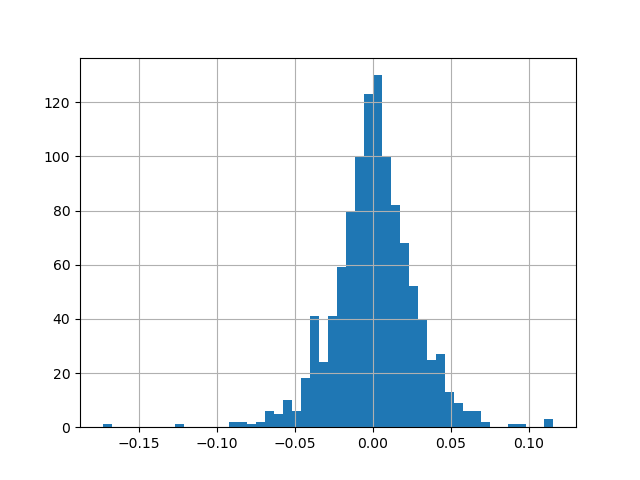

<AxesSubplot:>

In [28]:
fit, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

# This shows how many days the return of the portfolio had a return of close to zero. 
# Often the negative return is more extreme than the postive return, perhaps because when people panic,
# they panic. This could be explained by Daniel Kahneman's hypothesis of evlotionary psycological
# developement to be more sensitive to threat, than to reward.

In [29]:
# CALCULATING THE SHARPE RATIO
# Combining the return, with the risk.

# Sharpe Ratio = (Return of portfolio - Risk free return) / standard deviation of portfolio

log_return.std()


0.026428961864283066

In [30]:
# Calculating on a daily basis
log_return.mean()

# This is the average return per day

0.0012344676492482174

In [31]:
sharpe_ratio = log_return.mean() / log_return.std()
sharpe_ratio

0.04670889668642324

In [41]:
# Annualised Sharpe Ratio (there are 252 trading days per year)

asr = sharpe_ratio*252**.5
asr

0.7414807478789088

In [42]:
# To get context for the perforamance of this portfolio, it can be compared to a random portoflio sample.

weight = np.random.random(4)
weight /= weight.sum()
weight


array([0.21761648, 0.34504145, 0.12940964, 0.30793243])

In [43]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)

In [44]:
sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [45]:
asr2 = sharpe_ratio2*252**.5
asr2

0.4849190676933601

In [40]:
# Comparing our portfolio to a random portofolio

asr - asr2

0.37056623665258365

In [ ]:
# Combining risk and return, the portfolio is better.